# Two-factor gaussian yield curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Let $B = (B1,B2)$ be a Brownian motion in $R^2$ under the risk-neutral measure $Q$, and $x_i$, $λ_i$, $θ_i$, $σ_i$ be some positive parameters. We assume that the instantaneous interest rate is defined by
$r := X(1) + X(2)$ where $dX(i) = λ (θ − X(i))dt + σ dBi, X(i) = x , i = 1, 2.$ <br>

By Ito’s formula, we have $X(i)_{t_j} = θ + (X(i)_{t_{j-1}} θ_i )e^{−λi}h + σ\int _{[t{j-1},t{j}]}  e^{−λi (t_j −s)} dB_s(i) , j = 1, . . . , n, i = 1, 2.$


## Monte Carlo simulation of M trajectories of the instantaneous rate 

In [2]:
def X(theta,x0, lambda_i , sigma ,T, n,M):
    X_vect = np.zeros((n,M))
    X_vect[0] =x0
    h= T/n
    
    gauss= np.random.randn(n-1,M)
    var = (1-np.exp(-2*lambda_i*h) ) / (2*lambda_i)
    integral_term = gauss* sigma * np.sqrt(var)
    
    betha = integral_term+ theta* (1- np.exp(-lambda_i*h) ) #X est de la forme Xi+1= alpha*Xi+betha_i 
    alpha = np.exp(-lambda_i*h)
    
    for i in range(1,n):
        X_vect[i] = alpha*X_vect[i-1]+betha[i-1]
    
    return(X_vect.T)

def generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M):
    X1= X(theta_1,x0_1, lambda_1 , sigma_1,T, n,M)
    X2= X(theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
    
    return(X1+X2)
    

In [3]:
theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M=0.05,0.02, 1 , 0.05,0.05,0.02, 0.1 , 0.05 ,15, 1500,10**4
h=T/n
r_m_t = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)



In [4]:
def Monte_Carlo_P0(r_m_t,h):
    cumsum = np.cumsum(r_m_t[:,1:],axis=1)
    exp = np.exp(-cumsum*h)
    
    esp = np.mean(exp,axis=0)
    return(esp)


table_MC_PO = Monte_Carlo_P0(r_m_t,h)
def Monte_Carlo_R0(table_MC_PO,h,j):
    P0 = table_MC_PO[j-1]
    return(-np.log(P0)/(j*h))


In [7]:
def R0(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,j,h):
    tj= j*h
    
    integrale1 = (tj +   2*np.exp(-lambda_1*tj)/lambda_1 - 2/lambda_1   -np.exp(-2*lambda_1*tj)/(2*lambda_1)+1/(2*lambda_1) )
    
    rho1= theta_1+ (x0_1-theta_1)*(1- np.exp(-lambda_1*tj) )/(lambda_1*tj) - sigma_1**2* integrale1 /(2*tj*lambda_1**2)
    
    integrale2 = (tj +   2*np.exp(-lambda_2*tj)/lambda_2-2/lambda_2   -np.exp(-2*lambda_2*tj)/(2*lambda_2)+1/(2*lambda_2) )
    rho2= theta_2+ (x0_2-theta_2)*(1- np.exp(-lambda_2*tj) )/(lambda_2*tj) - sigma_2**2* integrale2 /(2*tj*lambda_2**2)
    
    return(  rho1+rho2  ) 
    

In [8]:
tab_j = np.arange(1,n)
MC_R0 = [Monte_Carlo_R0(table_MC_PO,h,j) for j in tab_j]
R0_real = [R0(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,j,h) for j in tab_j]



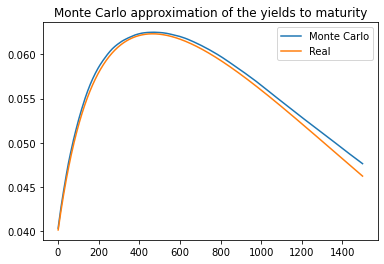

In [9]:
plt.plot(tab_j,MC_R0,label="Monte Carlo")
plt.plot(tab_j,R0_real,label="Real")


# displaying the title
plt.title("Monte Carlo approximation of the yields to maturity")
plt.legend()
plt.show()


## Effect of $x_i$

Fixing x2 and varying x1

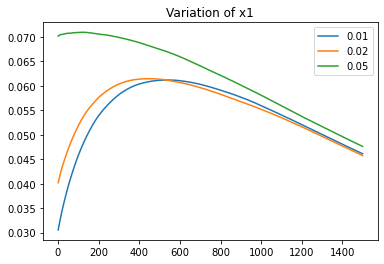

In [11]:
r_m_t_x1_1 = generate_M(theta_1,0.01, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x1_1 = Monte_Carlo_P0(r_m_t_x1_1,h)
MC_R0_x1_1 = [Monte_Carlo_R0(table_MC_PO_x1_1,h,j) for j in tab_j]

r_m_t_x1_2 = generate_M(theta_1,0.02, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x1_2 = Monte_Carlo_P0(r_m_t_x1_2,h)
MC_R0_x1_2 = [Monte_Carlo_R0(table_MC_PO_x1_2,h,j) for j in tab_j]

r_m_t_x1_3 = generate_M(theta_1,0.05, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x1_3 = Monte_Carlo_P0(r_m_t_x1_3,h)
MC_R0_x1_3 = [Monte_Carlo_R0(table_MC_PO_x1_3,h,j) for j in tab_j]


plt.plot(tab_j,MC_R0_x1_1,label="0.01")
plt.plot(tab_j,MC_R0_x1_2,label="0.02")
plt.plot(tab_j,MC_R0_x1_3,label="0.05")



# displaying the title
plt.title("Variation of x1")
plt.legend()
plt.show()

Fixing x1 and varying x2

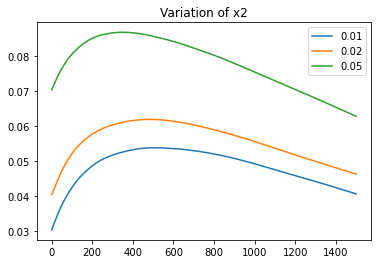

In [56]:
r_m_t_x2_1 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,0.01, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x2_1 = Monte_Carlo_P0(r_m_t_x2_1,h)
MC_R0_x2_1 = [Monte_Carlo_R0(table_MC_PO_x2_1,h,j) for j in tab_j]

r_m_t_x2_2 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,0.02, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x2_2 = Monte_Carlo_P0(r_m_t_x2_2,h)
MC_R0_x2_2 = [Monte_Carlo_R0(table_MC_PO_x2_2,h,j) for j in tab_j]

r_m_t_x2_3 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,0.05, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_x2_3 = Monte_Carlo_P0(r_m_t_x2_3,h)
MC_R0_x2_3 = [Monte_Carlo_R0(table_MC_PO_x2_3,h,j) for j in tab_j]


plt.plot(tab_j,MC_R0_x2_1,label="0.01")
plt.plot(tab_j,MC_R0_x2_2,label="0.02")
plt.plot(tab_j,MC_R0_x2_3,label="0.05")



# displaying the title
plt.title("Variation of x2")
plt.legend()
plt.show()

The variation of $x_1$ has an impact especially on zero coupon price when the maturity is low. It is easily understandable because $r_0 = x_0+x_1$ <br>
When can note that the variation of $x_2$ has more impact than the one of $x_1$. Indeed, for $X_2$ the drift term is wieghted by a lower term. Hence, we can easily understan why the effect is still significant even for dates longuer dates : the initial term has more importance.

##  Variation of $\theta$

Fixing $\theta_2$ and varying $\theta_1$

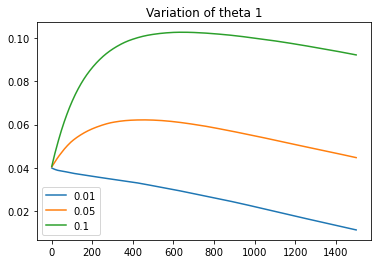

In [57]:
r_m_t_theta1_1 = generate_M(0.01,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta1_1 = Monte_Carlo_P0(r_m_t_theta1_1,h)
MC_R0_theta1_1 = [Monte_Carlo_R0(table_MC_PO_theta1_1,h,j) for j in tab_j]

r_m_t_theta1_2 = generate_M(0.05,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta1_2 = Monte_Carlo_P0(r_m_t_theta1_2,h)
MC_R0_theta1_2 = [Monte_Carlo_R0(table_MC_PO_theta1_2,h,j) for j in tab_j]

r_m_t_theta1_3 = generate_M(0.1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta1_3 = Monte_Carlo_P0(r_m_t_theta1_3,h)
MC_R0_theta1_3 = [Monte_Carlo_R0(table_MC_PO_theta1_3,h,j) for j in tab_j]


plt.plot(tab_j,MC_R0_theta1_1,label="0.01")
plt.plot(tab_j,MC_R0_theta1_2,label="0.05")
plt.plot(tab_j,MC_R0_theta1_3,label="0.1")



# displaying the title
plt.title("Variation of theta 1")
plt.legend()
plt.show()

Fixing $\theta_1$ and varying $\theta_2$

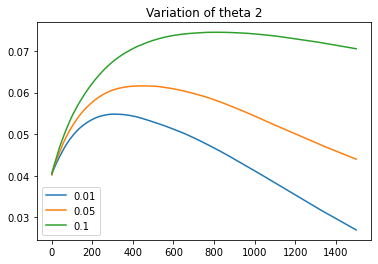

In [58]:
r_m_t_theta2_1 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,0.01,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta2_1 = Monte_Carlo_P0(r_m_t_theta2_1,h)
MC_R0_theta2_1 = [Monte_Carlo_R0(table_MC_PO_theta2_1,h,j) for j in tab_j]

r_m_t_theta2_2 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,0.05,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta2_2 = Monte_Carlo_P0(r_m_t_theta2_2,h)
MC_R0_theta2_2 = [Monte_Carlo_R0(table_MC_PO_theta2_2,h,j) for j in tab_j]

r_m_t_theta2_3 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,0.1,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_theta2_3 = Monte_Carlo_P0(r_m_t_theta2_3,h)
MC_R0_theta2_3 = [Monte_Carlo_R0(table_MC_PO_theta2_3,h,j) for j in tab_j]


plt.plot(tab_j,MC_R0_theta2_1,label="0.01")
plt.plot(tab_j,MC_R0_theta2_2,label="0.05")
plt.plot(tab_j,MC_R0_theta2_3,label="0.1")



# displaying the title
plt.title("Variation of theta 2")
plt.legend()
plt.show()

$\theta$ has a fairly similar impact in both cases.. <br>
Its variation causes the drift term to change. Thus, a variation in $\theta $ changes the final decay slope of the interest rate. Indeed, at a fixed time, $X_t$ converges in expectation to a term that depends linearly on $\theta$. <br>
The initial growth time also changes due to the fact that the drift term has a large initial impact. 

##  Variation of $\sigma$

Fixing $\sigma_2$ and varying $\sigma_1$

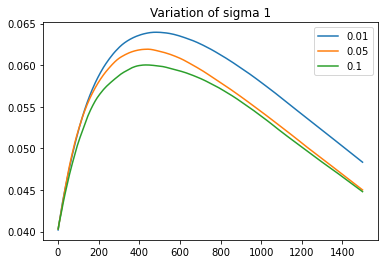

In [59]:
r_m_t_sigma1_1 = generate_M(theta_1,x0_1, lambda_1 , 0.01,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_sigma1_1 = Monte_Carlo_P0(r_m_t_sigma1_1,h)
MC_R0_sigma1_1 = [Monte_Carlo_R0(table_MC_PO_sigma1_1,h,j) for j in tab_j]

r_m_t_sigma1_2 = generate_M(theta_1,x0_1, lambda_1 , 0.05,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_sigma1_2 = Monte_Carlo_P0(r_m_t_sigma1_2,h)
MC_R0_sigma1_2 = [Monte_Carlo_R0(table_MC_PO_sigma1_2,h,j) for j in tab_j]

r_m_t_sigma1_3 = generate_M(theta_1,x0_1, lambda_1 , 0.1,theta_2,x0_2, lambda_2 , sigma_2 ,T, n,M)
table_MC_PO_sigma1_3 = Monte_Carlo_P0(r_m_t_sigma1_3,h)
MC_R0_sigma1_3 = [Monte_Carlo_R0(table_MC_PO_sigma1_3,h,j) for j in tab_j]

plt.plot(tab_j,MC_R0_sigma1_1,label="0.01")
plt.plot(tab_j,MC_R0_sigma1_2,label="0.05")
plt.plot(tab_j,MC_R0_sigma1_3,label="0.1")



# displaying the title
plt.title("Variation of sigma 1")
plt.legend()
plt.show()

Fixing $\sigma_2$ and varying $\sigma_1$

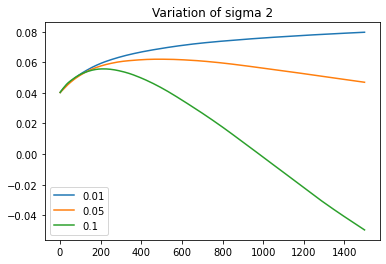

In [60]:
r_m_t_sigma2_1 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , 0.01 ,T, n,M)
table_MC_PO_sigma2_1 = Monte_Carlo_P0(r_m_t_sigma2_1,h)
MC_R0_sigma2_1 = [Monte_Carlo_R0(table_MC_PO_sigma2_1,h,j) for j in tab_j]

r_m_t_sigma2_2 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , 0.05 ,T, n,M)
table_MC_PO_sigma2_2 = Monte_Carlo_P0(r_m_t_sigma2_2,h)
MC_R0_sigma2_2 = [Monte_Carlo_R0(table_MC_PO_sigma2_2,h,j) for j in tab_j]

r_m_t_sigma2_3 = generate_M(theta_1,x0_1, lambda_1 , sigma_1,theta_2,x0_2, lambda_2 , 0.1 ,T, n,M)
table_MC_PO_sigma2_3 = Monte_Carlo_P0(r_m_t_sigma2_3,h)
MC_R0_sigma2_3 = [Monte_Carlo_R0(table_MC_PO_sigma2_3,h,j) for j in tab_j]

plt.plot(tab_j,MC_R0_sigma2_1,label="0.01")
plt.plot(tab_j,MC_R0_sigma2_2,label="0.05")
plt.plot(tab_j,MC_R0_sigma2_3,label="0.1")



# displaying the title
plt.title("Variation of sigma 2")
plt.legend()
plt.show()

The variation of $\sigma$ has a large effect on $X_2$ while sigma has less effect. <br> 
This is because the drift term has less of an impact on $X_2$ than the drift term for $X_1$. Thus, since changing $\sigma$ is the same as changing the diffusion term, we can see why the impact of $\sigma_2$ is greater.  